In [13]:
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
import pickle  
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords  
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

In [16]:
#C:\Users\Sirmad Hashmi\Documents\msc\thesis\thesis 20k9\youtube final data
gB_path = "C:/Users/Sirmad Hashmi/Documents/msc/thesis/thesis 20k9/Testing data/gB_full_2400.csv"
gB_Csv = pd.read_csv(gB_path, encoding='utf-8')
gB_df = pd.DataFrame(gB_Csv)

In [17]:
print(gB_df.head())
len(gB_df)
#print(gB_df['comment_text'].shape)

                                               words  Sentiment
0  accurate, call, 1000, price, closer, calling, ...          1
1  power, disease, care, cure, keep, caring, othe...          1
2  keep, calm, buy, iphone, 8, keep, calm, buy, i...          1
3   apple, commented, last, video, im, crying, right          1
4               im, see, emma, love, much, im, proud          1


72000

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
X = vect.fit_transform(gB_df['words'].astype(str)) 
y = gB_df['Sentiment']

In [5]:
print(len(vect.vocabulary_))
print(vect.vocabulary_)

19614
{'accurate': 857, 'call': 3051, '1000': 74, 'price': 13804, 'closer': 3664, 'calling': 3054, '10': 72, 'power': 13671, 'disease': 5238, 'care': 3149, 'cure': 4513, 'keep': 9758, 'caring': 3161, 'others': 12764, 'best': 2316, 'life': 10264, 'calm': 3057, 'buy': 2985, 'iphone': 9275, 'plus': 13499, 'favourite': 6552, 'apple': 1502, 'commented': 3849, 'last': 10039, 'video': 18428, 'im': 8884, 'crying': 4435, 'right': 14817, 'see': 15368, 'emma': 5882, 'love': 10578, 'much': 11596, 'proud': 13975, 'started': 16447, '4901': 514, 'emmas': 5884, 'ep': 6041, 'showed': 15706, 'years': 19270, 'late': 10048, 'wireless': 19003, 'charging': 3372, 'oled': 12607, 'technology': 17111, 'old': 12599, 'facial': 6406, 'recognition': 14418, 'tech': 17101, 'enhanced': 5976, 'ir': 9282, 'every': 6220, 'frontwhat': 7099, 'know': 9887, 'lets': 10207, 'lose': 10548, 'makes': 10749, 'product': 13868, 'instantly': 9144, 'recognizable': 14419, 'apples': 1503, 'windows': 18978, 'samsung': 15123, 'bound': 266

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)  

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
classifier = AdaBoostClassifier(algorithm='SAMME.R',base_estimator=None,learning_rate=1.0,
                                n_estimators=1000,random_state=0)  
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1000, random_state=0)

In [22]:
y_pred = classifier.predict(X_test)  

In [23]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[6024  660  516]
 [  78 7085   37]
 [1428  168 5604]]
              precision    recall  f1-score   support

          -1       0.80      0.84      0.82      7200
           0       0.90      0.98      0.94      7200
           1       0.91      0.78      0.84      7200

   micro avg       0.87      0.87      0.87     21600
   macro avg       0.87      0.87      0.86     21600
weighted avg       0.87      0.87      0.86     21600

0.8663425925925926


In [24]:
from sklearn.externals import joblib
joblib.dump(classifier, 'adaBoostGB_72000.pkl') 

['adaBoostGB_72000.pkl']

In [25]:
import pickle
from sklearn.externals import joblib

In [26]:
model = joblib.load('adaBoostGB_72000.pkl') 

In [27]:
y_pred1 = model.predict(X_test) 

In [28]:
import matplotlib.pyplot as plt
import itertools

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[6024  660  516]
 [  78 7085   37]
 [1428  168 5604]]


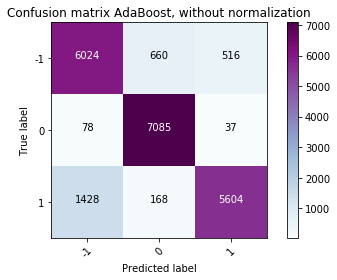

In [34]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred1), classes=['-1','0','1'], cmap=plt.cm.BuPu, 
                      title='Confusion matrix AdaBoost, without normalization')

Normalized confusion matrix
[[0.83666667 0.09166667 0.07166667]
 [0.01083333 0.98402778 0.00513889]
 [0.19833333 0.02333333 0.77833333]]


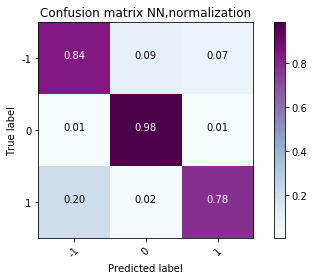

In [33]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred1), classes=['-1','0','1'], cmap=plt.cm.BuPu, 
                      normalize=True,
                      title='Confusion matrix NN,normalization')